# 8.프로젝트: 고양이 수염 스티커 만들기  
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


---

### (본문)

### STEP 0: 주요 라이브러리 import

In [12]:
# 라이브러리 실행
import os
import cv2 # 이미지를 처리를 위함.#pip install opencv-python
import matplotlib.pyplot as plt # 이미지를 출력하기 위함. 
import numpy as np

#dlib는 python 3.7이상 버전에서 cmake와 같이 사용해야함.
# 방법 1: 그냥 설치
# 방법 1-1.pip install cmake
# 방법 1-2 pip install dlib
# 방법 2: 방법 1번이 안될 경우 (macOS vscode 기준)
# 방법 2-1. vscode에서 c++ cmake 지원 프로그램 설치
# 방법 2-2. pip install cmake
# 방법 2-3. pip install dlib
import dlib


#### 이미지 사진 불러오기

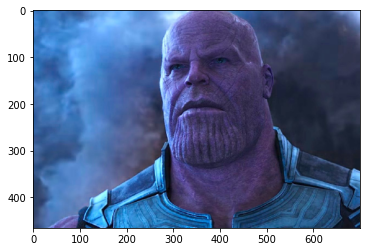

In [2]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_1.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

#### 이미지 보정  
open cv는 RGB가 아닌 BGR순으로 출력하여 기존 이미지와 색이다름. 이로인해 RGB로 바꿔주는 보정처리를 해줘야함.

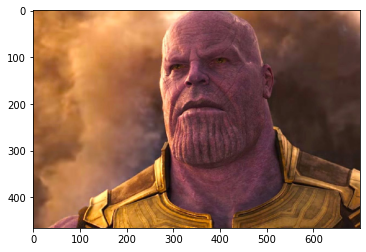

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

### STEP 1: 스티커 구하기 or 만들기

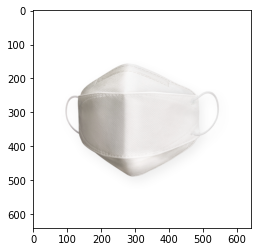

In [4]:
sticker1_path = os.getenv("HOME") + "/Desktop/Code/LMS/E_08_cv2_dlib/sticker_2.png"
stick_bgr = cv2.imread(sticker1_path)    # OpenCV로 이미지를 불러오기
stick_show = stick_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(stick_bgr)
plt.show()

### STEP 2: 얼굴 검출 & 랜드마크 검출 하기 

#### 얼굴 검출하기
dlib의 face detector는 HOG와 SVM을 사용하여 얼굴을 찾아냄

In [5]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(230, 23) (498, 290)]]


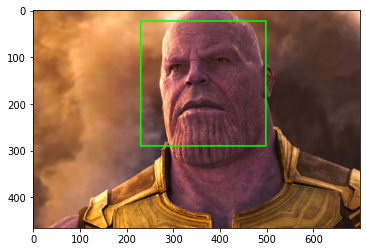

In [6]:
# 찾은 얼굴의 영역을 박스로 표시

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### STEP 3: 스티커 적용 위치 확인하기 

In [7]:
# 파이썬에서 직접 Dlib ibug 300W 데이터 셋을 다운로드하여 사용
# pip install wget
import wget

site_url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
file_name = wget.download(site_url)
print(file_name)
print("dat설치완료")

shape_predictor_68_face_landmarks.dat (1).bz2
dat설치완료


#### Face Landmark  
face landmark는 박스 형태로 검출된 얼굴 이미지를 이용한다. Dlib은 ibug 300w 데이터셋을 사용하였고 이목구비의 위치를 68개의 랜드마크로 표현한다.


In [7]:
model_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


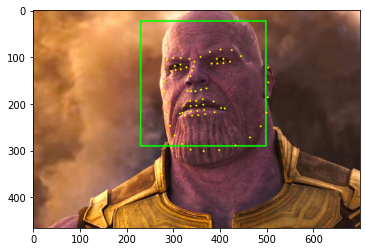

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[65]) # 입의 중심점 index : 62
    x = landmark[65][0]
    y = landmark[65][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(366, 213)
(x,y) : (366,79)
(w,h) : (269,269)


### STEP 4: 스티커 적용하기 

(269, 269, 3)


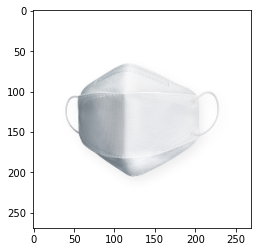

In [11]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sticker_2.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [12]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (232,79)


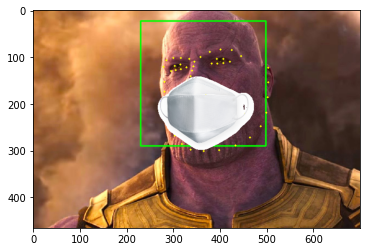

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

스티커 위치가 적당한 것을 확인.  
bounding box와 landmark를 제거

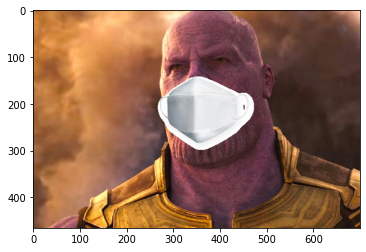

In [14]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### STEP 5: 문제점 찾아보기 

---

#### 투명도 조절하기

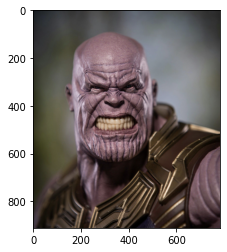

In [13]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

rectangles[[(91, 143) (553, 605)]]


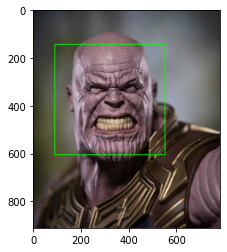

In [14]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
# 찾은 얼굴의 영역을 박스로 표시

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


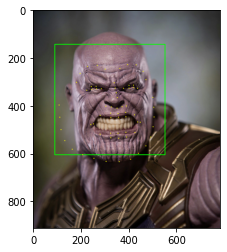

(228, 236)
(x,y) : (228,5)
(w,h) : (463,463)


In [19]:
model_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[19]) # 눈썹 외곽 index : 17
    x = landmark[19][0]
    y = landmark[19][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(463, 463, 3)


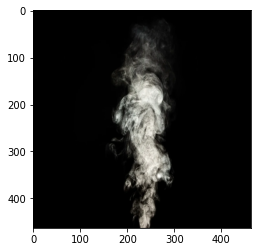

In [20]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sticker_8.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

(x,y) : (0,5)


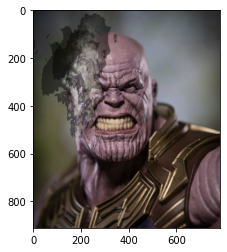

In [21]:
refined_x = x - w // 2
refined_y = y
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :]
#     refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 루브릭.

|평가문항|비고|상세기준|비고|
|:---|:---:|:---|:---:|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.	||원본에 스티커 사진이 정상적으로 합성되었다.||
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	||정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다||
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.||얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.| |

---

### 회고록.

----

### Reference. (APA)

-----